# Eksploracja zbioru "Spaceship Titanic" - Weronika Zbierowska

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

## Opis zbioru

In [2]:
df = pd.read_csv('../../dane.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [26]:
print(f'Liczba wierszy = {df.shape[0]}')
print(f'Liczba kolumn = {df.shape[1]}')

Liczba wierszy = 8693
Liczba kolumn = 14


### Opis kolumn

* __PassengerId__ - unikalny identyfikator każdego pasażera. Każdy identyfikator ma postać gggg_pp, gdzie gggg oznacza grupę, z którą podróżuje pasażer, a pp to jego numer w grupie. Osoby w grupie są często członkami rodziny, ale nie zawsze.

* __HomePlanet__ - planeta, z której pasażer odleciał, zazwyczaj planeta stałego zamieszkania.

* __CryoSleep__ - wskazuje, czy pasażer zdecydował się zostać wprowadzony w stan hibernacji na czas podróży. Pasażerowie w stanie “kriosnu” są zamknięci w swoich kabinach.

* __Cabin__ - numer kabiny, w której przebywa pasażer. Przyjmuje postać deck/num/side, gdzie side może oznaczać P (lewą burtę) lub S (prawą burtę).

* __Destination__ - planeta, na którą podróżuje pasażer.

* __Age__ - wiek pasażera.

* __VIP__ - informacja, czy pasażer zapłacił za specjalną usługę VIP podczas rejsu.

* __RoomService__, __FoodCourt__, __ShoppingMall__, __Spa__, __VRDeck__ - kwota, jaką pasażer zapłacił za korzystanie z wielu luksusowych udogodnień na statku kosmicznym Titanic.

* __Name__ - imię i nazwisko pasażera.

* __Transported__ - informacja, czy pasażer został przetransportowany do innego wymiaru. To informacja, którą chcemy przewidzieć tworząć model machine learningowy (patrz opis zadania).

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### Braki w danych

In [28]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [29]:
for col in df.columns[1:]:
    print(f'\n{col}')
    print(df[col].unique())


HomePlanet
['Europa' 'Earth' 'Mars' nan]

CryoSleep
[False True nan]

Cabin
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']

Destination
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]

Age
[39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]

VIP
[False True nan]

RoomService
[   0.  109.   43. ... 1569. 8586.  745.]

FoodCourt
[   0.    9. 3576. ... 3208. 6819. 4688.]

ShoppingMall
[   0.   25.  371. ... 1085.  510. 1872.]

Spa
[   0.  549. 6715. ... 2868. 1107. 1643.]

VRDeck
[   0.   44.   49. ... 1164.  971. 3235.]

Name
['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']

Transported
[False  True]


## Przygotowanie do analizy

In [3]:
df['GroupNo'] = df['PassengerId'].str.split('_', expand=True).loc[:, 0]
df = df.drop('PassengerId', axis=1)

In [4]:
df[['Deck', 'Side']] = df['Cabin'].str.split('/', expand=True).loc[:, [0, 2]]

In [5]:
df['TotalExpenses'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

In [6]:
df = df.drop('Name', axis=1)

In [7]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupNo,Deck,Side,TotalExpenses
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,B,P,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,F,S,736.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,A,S,10383.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,A,S,5176.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,F,S,1091.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePlanet     8492 non-null   object 
 1   CryoSleep      8476 non-null   object 
 2   Cabin          8494 non-null   object 
 3   Destination    8511 non-null   object 
 4   Age            8514 non-null   float64
 5   VIP            8490 non-null   object 
 6   RoomService    8512 non-null   float64
 7   FoodCourt      8510 non-null   float64
 8   ShoppingMall   8485 non-null   float64
 9   Spa            8510 non-null   float64
 10  VRDeck         8505 non-null   float64
 11  Transported    8693 non-null   bool   
 12  GroupNo        8693 non-null   object 
 13  Deck           8494 non-null   object 
 14  Side           8494 non-null   object 
 15  TotalExpenses  7785 non-null   float64
dtypes: bool(1), float64(7), object(8)
memory usage: 1.0+ MB


## Analiza rozkładu danych

### Atrybuty kategoryczne

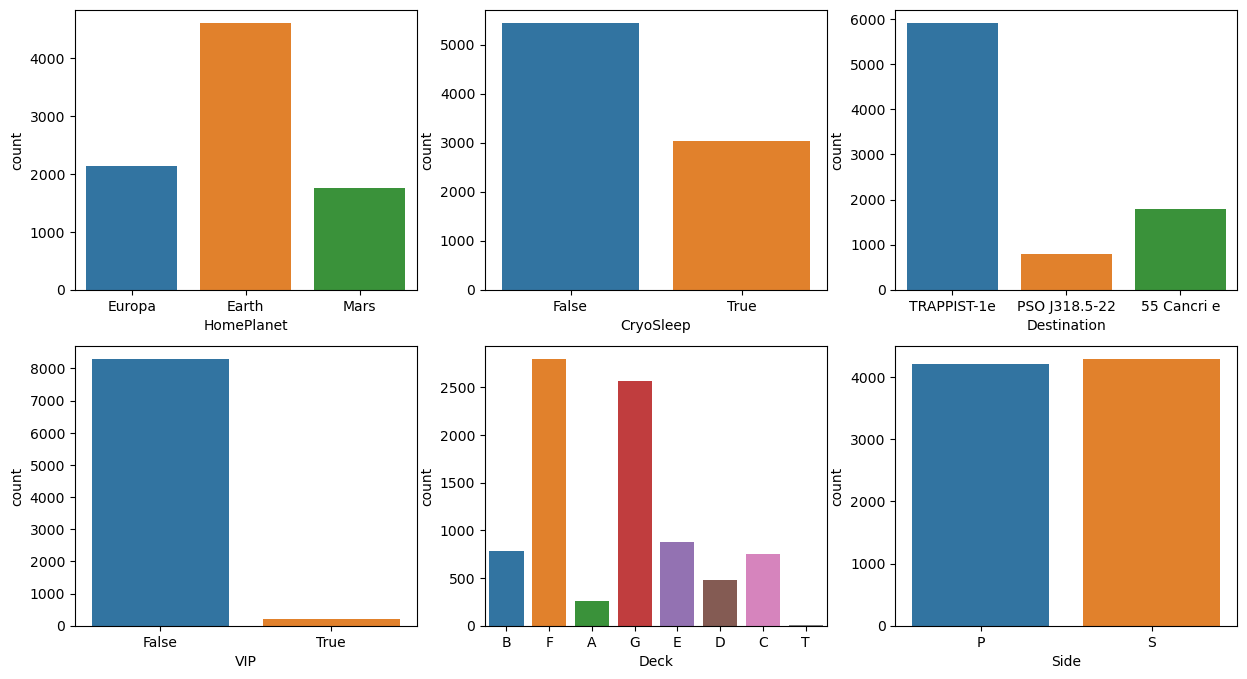

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
attributes = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

for i, attribute in enumerate(attributes):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    sns.countplot(data=df, x=attribute, ax=ax)

plt.show()

__Wnioski:__
* większość pasażerów pochodzi z Ziemi
* ok. 2/3 pasażerów nie została wprowadzona w stan kriosnu
* najpopularniejszą planetą docelową była 'TRAPPIST-1e', a najmniej 'PSO J318.5-22'
* bardzo mała część zbioru zakupiła usługę VIP
* zamieszkanie poszczególnych pokładów jest nierównomierne:
    * najwięcej na pokładach F i G
    * prawie nikt na pokładzie T
* równomierne zamieszkanie burt

Text(0, 0.5, 'number of groups')

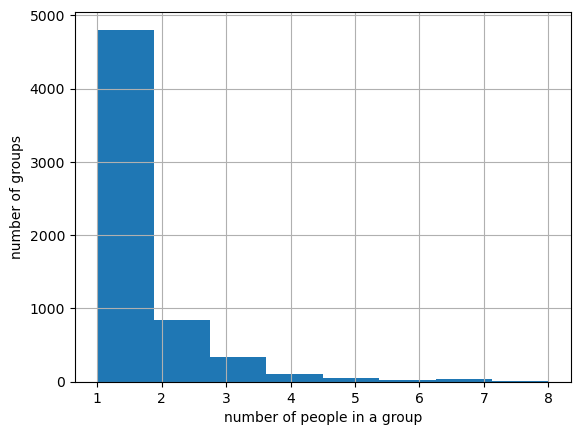

In [37]:
df['GroupNo'].value_counts().hist(bins=8)
plt.xlabel('number of people in a group')
plt.ylabel('number of groups')

__Wnioski:__
* najwięcej grup było 1-osobowych
* liczba grup o danej liczebności generalnie malała wraz ze wzrostem liczebności
* największą grupa miała 8 osób

Text(0, 0.5, 'number of cabins')

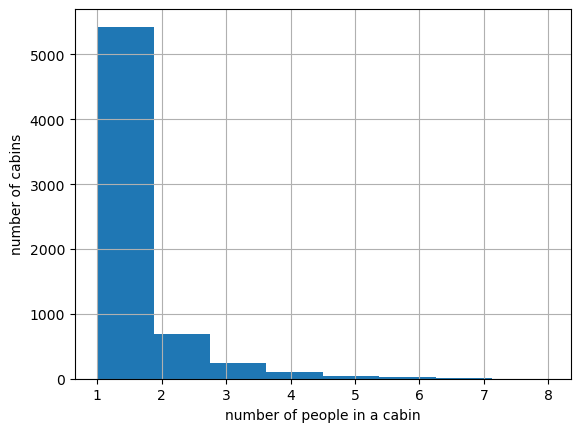

In [38]:
df['Cabin'].value_counts().hist(bins=8)
plt.xlabel('number of people in a cabin')
plt.ylabel('number of cabins')

__Wnioski:__
* rozkład liczbności kabin jest podobny do rozkładu liczebności grup
* najwięcej było kabin 1-osobowych
* liczba kabin o danej liczebności generalnie malała wraz ze wzrostem liczebności
* w 1 kabinie maksymalnie było 8 osób

### Atrybuty numeryczne

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

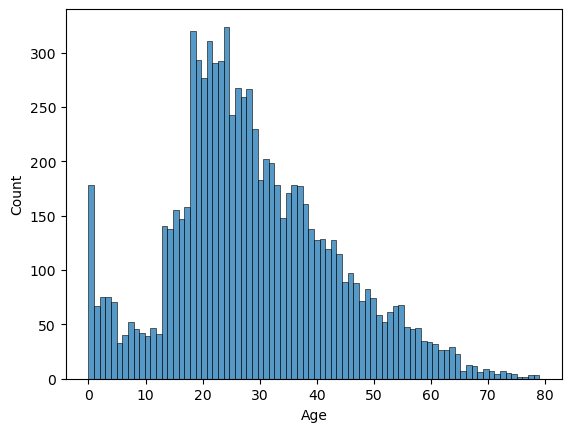

In [39]:
sns.histplot(data=df, x='Age', bins=80)
df['Age'].describe()

__Wnioski:__
* w rejsie uczestniczyły osoby w zróżnicowanym wieku 0-79 lat
* grupa wiekowa 20-30 lat była najbardziej liczna
* w rejsie uczestniczyło zaskakująco dużo niemowląt (wiek = 0 lat) - mam nadzieję, że to nie błąd w danych
* w rejsie nie uczestniczyło wiele nieletnich, szczególnie w wieku 1-12 lat
* od ok. 25. roku życia, liczba pasażerów stabilnie spada wraz ze wzrostem wieku

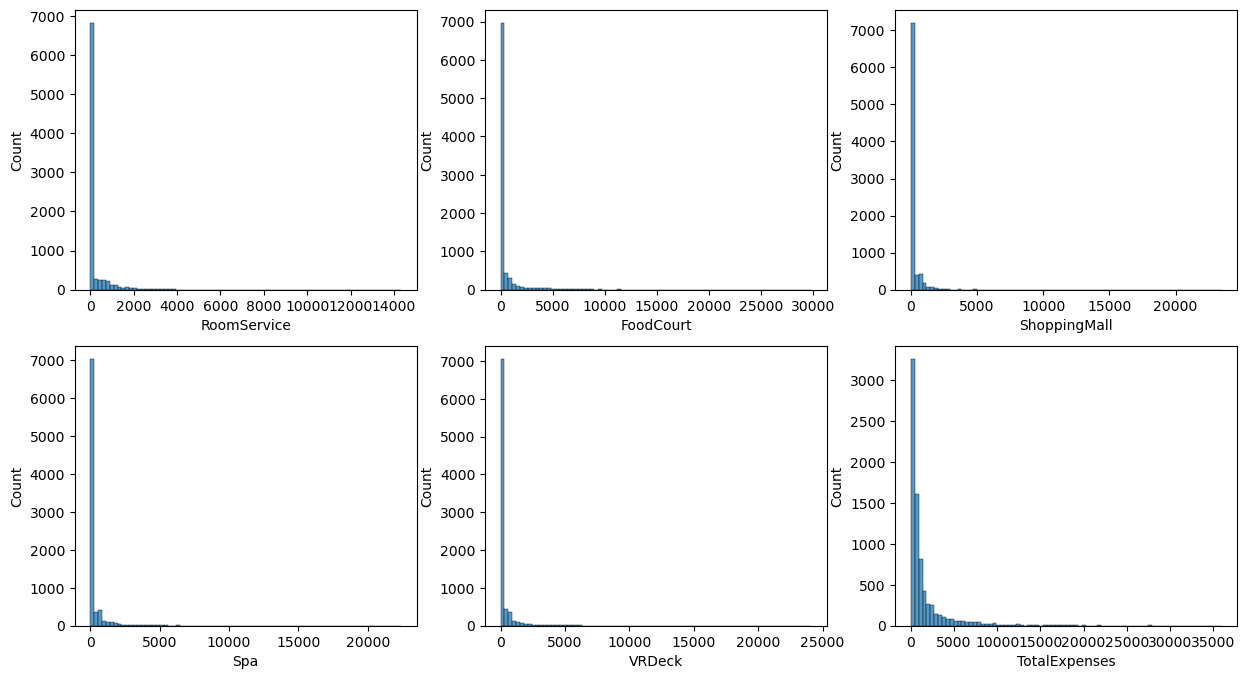

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalExpenses
count,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,7785.000000
mean,224.687617,458.077203,173.729169,311.138778,304.854791,1484.601541
std,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2845.288241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,736.000000
75%,47.000000,76.000000,27.000000,59.000000,46.000000,1486.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000


In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
attributes = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalExpenses']

for i, attribute in enumerate(attributes):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    sns.histplot(data=df, x=attribute, ax=ax, bins=80)

plt.show()

df[attributes].describe()

__Wnioski:__
* rozkład wydatków na udogodnienia jest podobny dla wszystkich udogodnień
* zdecydowana większość pasażerów nie wydała nic na poszczególne udogodnienia
* w zbiorze występują jednostki odstające, które wydały kwoty rzędu dziesiątek tysięcy na dane udogodnienie
* rozkład zmiennej `TotalExpenses` pokazuje, że niekoniecznie zawsze ci sami pasażerowie korzystali ze wszystkich udogodnień

### Zbalansowanie zbioru

<Axes: xlabel='Transported', ylabel='count'>

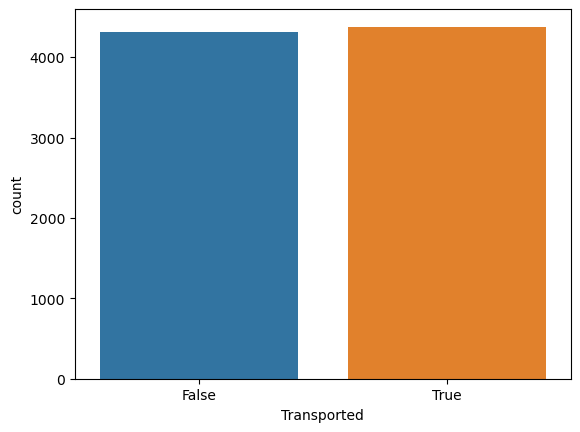

In [41]:
sns.countplot(data=df, x='Transported')

__Wnioski__:
* ilość rekordów jest porównywalna dla obywdu klas atrybutu decyzyjnego
* zbiór jest zbalansowany

## Analiza danych z podziałem na klasy

### Atrybuty kategoryczne

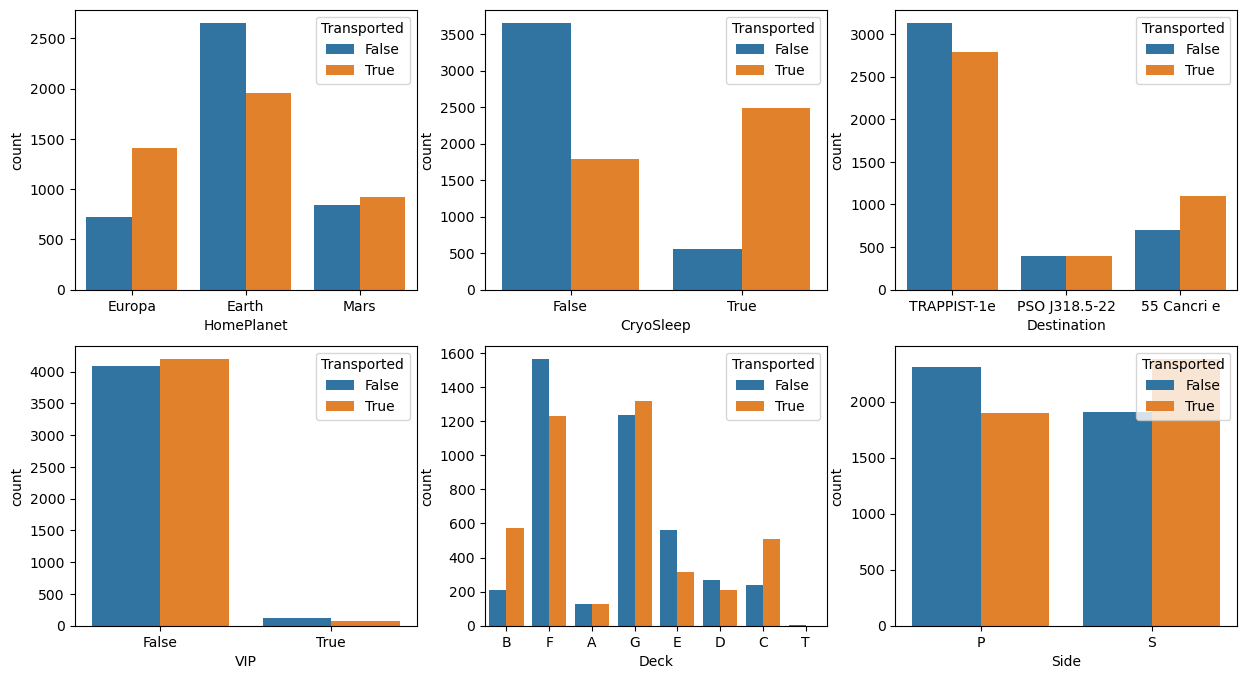

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
attributes = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

for i, attribute in enumerate(attributes):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    sns.countplot(data=df, x=attribute, ax=ax, hue='Transported')

plt.show()

__Wnioski:__
* `HomePlanet`:
    * większość pasażerów z planety 'Europa' została przetransportowana do innego wymiaru
    * większość pasażerów z Ziemi nie została przetransportowana
* `CryoSleep`:
    * duży wpływ atrybutu na atrybut decyzyjny `Transported`
    * zdecydowana większość pasażerów wprowadzonych w stan kriosnu została przetransportowana
    * ok. 2/3 pasażerów nie wprowadzonych w stan kriosnu nie została przetransportowana
* `Destination`:
    * większość pasażerów o planecie docelowej 'TRAPPIST-1e' nie została przetransportowana
    * większość pasażerów o planecie docelowej '55 Cancri e' została przetransportowana
* `VIP`:
    * znikomy wpływ atrybutu na atrybut decyzyjny `Transported`
* `Deck`:
    * zróżnicowany wpływ pokładu na przetransportowanie
    * większość pasażerów mieszkających na pokładach: B, G i C została przetransportowana
    * większość pasażerów mieszkających na pokładach: F, E i D nie została przetransportowana
* `Side`:
    * większa część pasażerów przetransportowanych mieszkała na burcie S (Starboard), czyli prawej

### Atrybuty numeryczne

<Axes: xlabel='Age', ylabel='Count'>

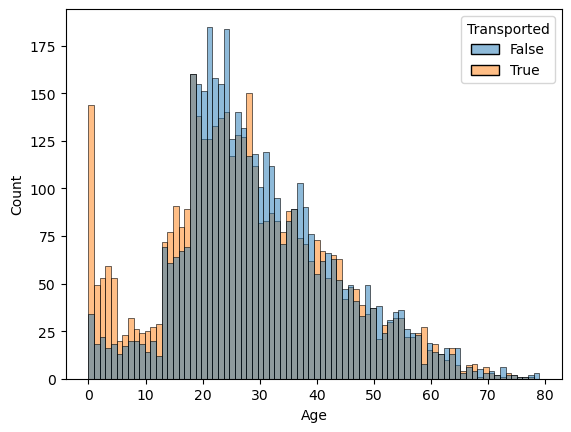

In [43]:
sns.histplot(data=df, x='Age', hue='Transported', bins=80)

__Wnioski:__
* większość osób poniżej 18. roku życia została przetransportowana do innego wymiaru
* zdecydowana większość noworodków została przetransportowana
* większość osób w grupie wiekowej 20-30 lat nie została przetransportowana

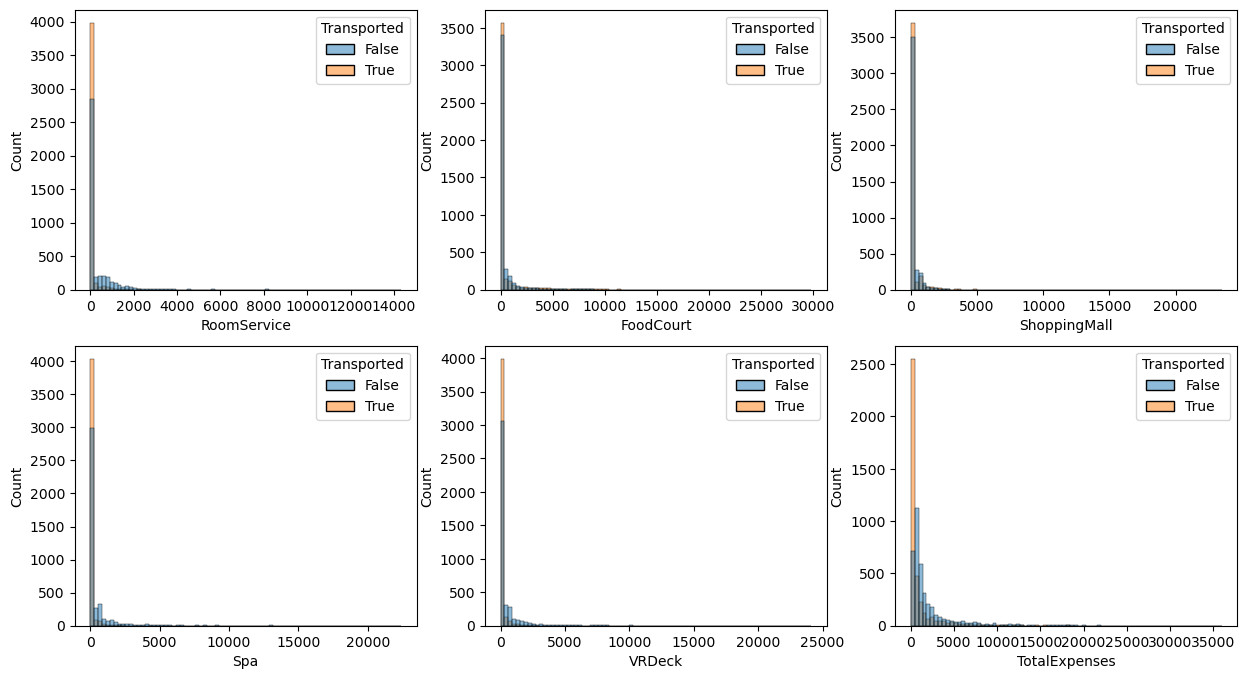

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
attributes = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalExpenses']

for i, attribute in enumerate(attributes):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    sns.histplot(data=df, x=attribute, ax=ax, hue='Transported', bins=80)

plt.show()

__Wnioski:__
* większość osób nie korzystających z udogodnień została przetransportowana do innego wymiaru
* większość osób korzystających z udogodnień nie została przetransportowana

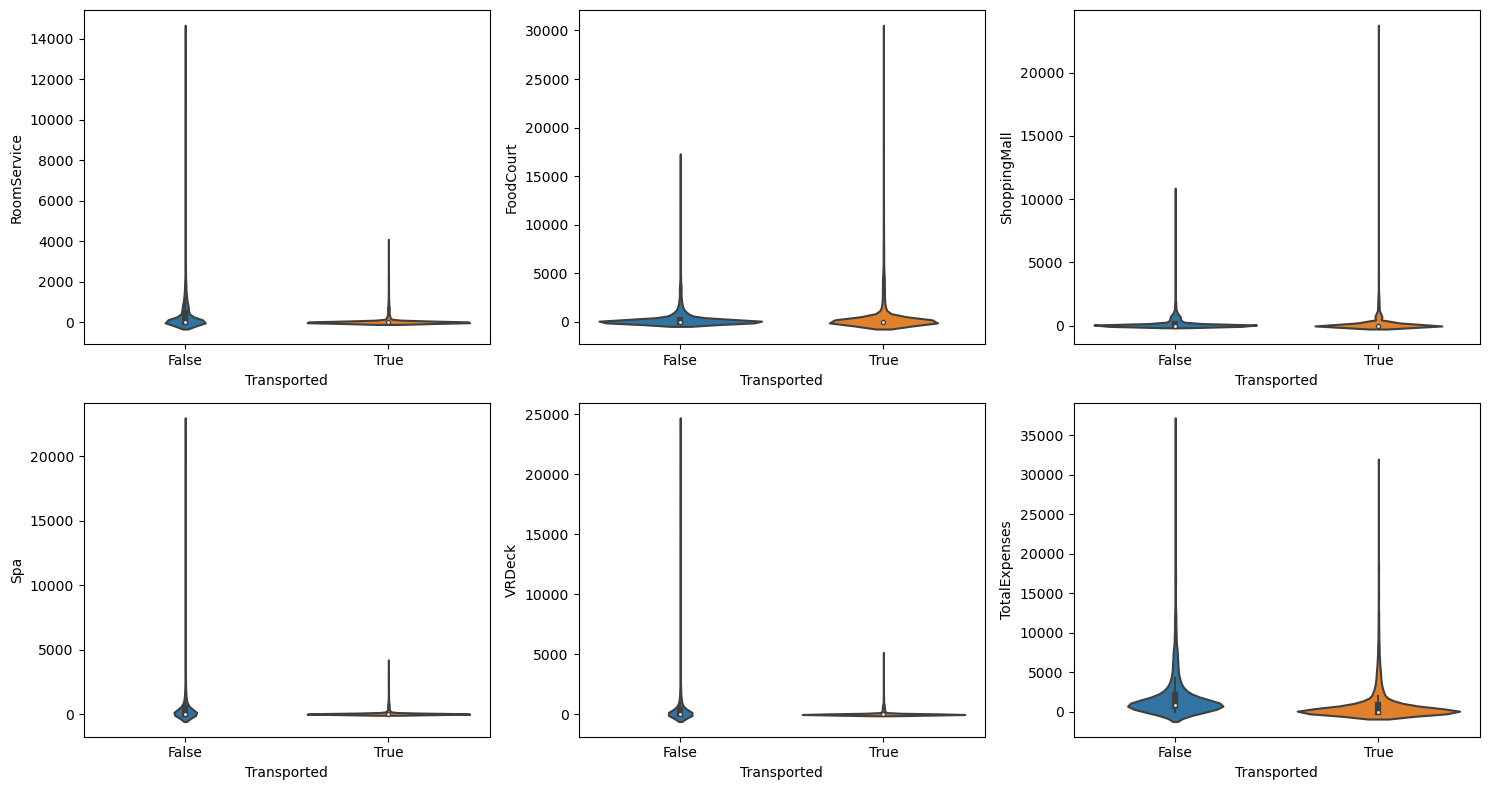

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
attributes = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalExpenses']

for i, attribute in enumerate(attributes):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    sns.violinplot(data=df, x='Transported', y=attribute, ax=ax)

plt.tight_layout()
plt.show()

## Analiza korelacji

<Axes: >

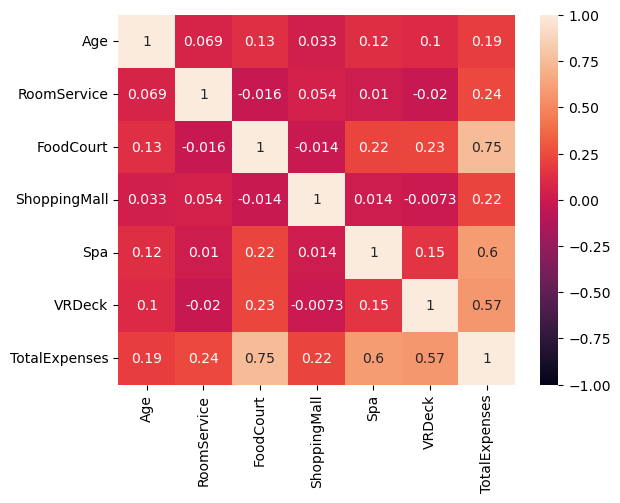

In [46]:
df_num = df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalExpenses']]
sns.heatmap(df_num.corr(numeric_only=True), annot=df_num.corr(numeric_only=True), vmin=-1, vmax=1)

__Wnioski:__
* silnie skorelowany jest tylko atrybut `TotalExpenses` z atrybutami, które są jego składowymi: `FoodCourt`, `Spa` i `VRDeck`
* korelacja atrybutu `TotalExpenses` z atrybutami `RoomService` i `ShoppingMall` nie jest silna mimo tego, że również są jego składowymi

## Analiza relacji między atrybutami

### Czy wiek pasażera miał wpływ na jego decyzję o wprowadzenie w stan kriosnu?

<Axes: xlabel='Age', ylabel='Count'>

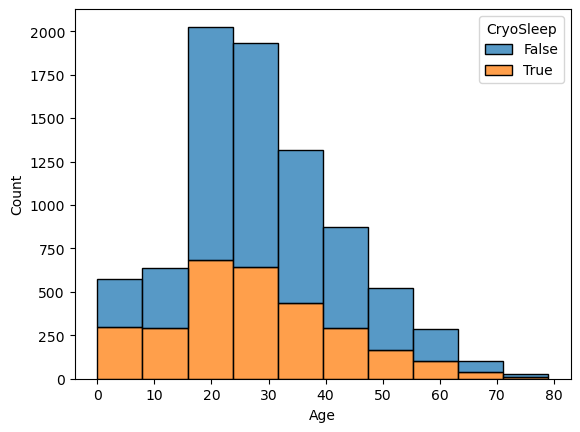

In [47]:
df_cryo = df[~pd.isna(df['CryoSleep'])]
sns.histplot(data=df_cryo, x='Age', hue='CryoSleep', bins=10, multiple='stack')

__Wnioski:__
* w grupie osób 20-30 lat jest największy udział osób nie wprowadzonych w stan kriosnu
* w grupie osób 0-20 lat mniej więcej po równo jest osób wprowadzonych i nie wprowadzonych w stan kriosnu
* w prawie wszystkich grupach wiekowych osoby wprowadzone w stan kriosnu są mniejszością

### Czy wiek pasażera miał wpływ na jego decyzję o zakupieniu usługi VIP?

<Axes: xlabel='Age', ylabel='Count'>

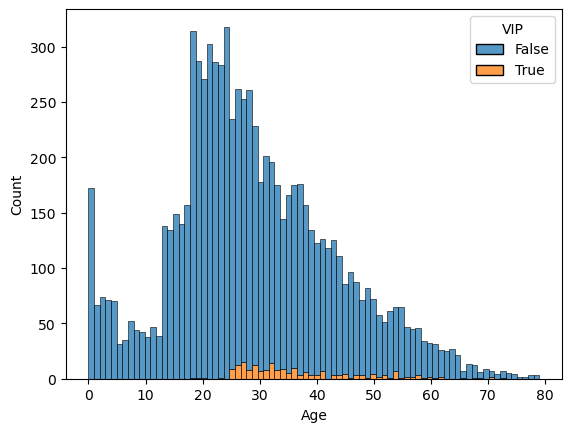

In [48]:
df_vip = df[~pd.isna(df['VIP'])]
sns.histplot(data=df_vip, x='Age', hue='VIP', bins=80, multiple='stack')

In [49]:
vip_min_age = df[df['VIP'] == True]['Age'].min()
print(f'Wiek najmłodszego pasażera, który zakupił usługę VIP = {vip_min_age}')

Wiek najmłodszego pasażera, który zakupił usługę VIP = 18.0


__Wnioski:__
* fakt, że najmłodszy pasażer VIP miał 18 lat, może oznaczać jakieś ograniczenia wiekowe (pełnoletność) do zakupu usługi VIP
* większość pasażerów VIP miała ponad 25 lat

### Czy status VIP pasażera miał wpływ na miejsce jego kabiny?

<Axes: xlabel='Side', ylabel='count'>

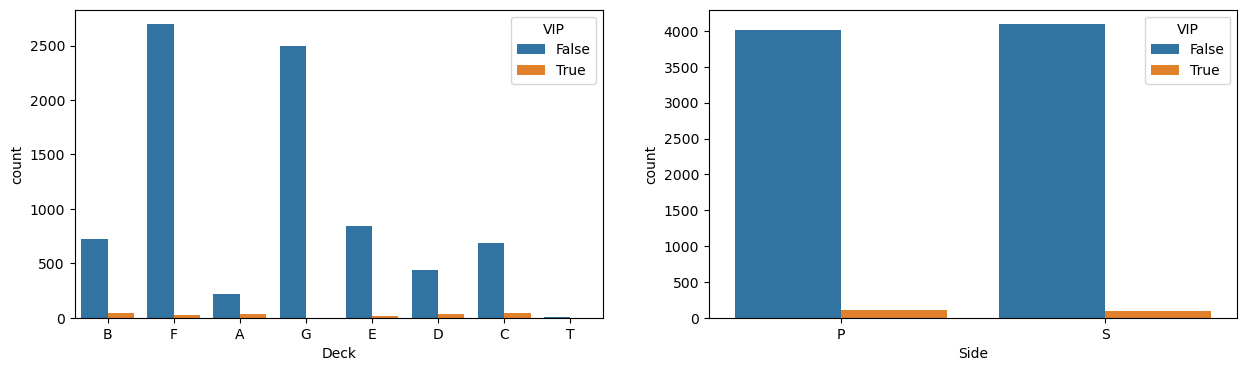

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
sns.countplot(data=df, x='Deck', ax=axes[0], hue='VIP')
sns.countplot(data=df, x='Side', ax=axes[1], hue='VIP')

In [51]:
vip_deck_g = df_vip[(df_vip['VIP'] == True) & (df_vip['Deck'] == 'G')].shape[0]
print(f'Liczba pasażerów VIP o kabinie na pokładzie G = {vip_deck_g}')

Liczba pasażerów VIP o kabinie na pokładzie G = 0


__Wnioski:__
* na pokładzie G nie mieszkał żaden pasażer VIP (może to być przypadkowe, ponieważ zbiór nie zawiera wiele rekordów o pasażerach VIP)
* żaden z pokładów nie wyróżnia się jako 'dla VIP-ów'
* status VIP nie ma wpływu na burtę, na której mieszkał pasażer

### Czy pasażerowie wprowadzeni w stan kriosnu korzystali z udogodnień?

In [52]:
cryo_expenses = df[(df['CryoSleep'] == True) & (df['TotalExpenses'] > 0)].shape[0]
print(f'Liczba pasażerów wprowadzonych w stan kriosnu, którzy korzystali z udogodnień = {cryo_expenses}')

Liczba pasażerów wprowadzonych w stan kriosnu, którzy korzystali z udogodnień = 0


__Wnioski:__
* żaden z pasażerów wprowadzonych w stan kriosnu nie korzystał z udogodnień
* ta liczba była do przewidzenia i potwierdza znaczenie 'kriosnu'

### Jak pasażerowie nie wprowadzeni w stan kriosnu korzystali z udogodnień?

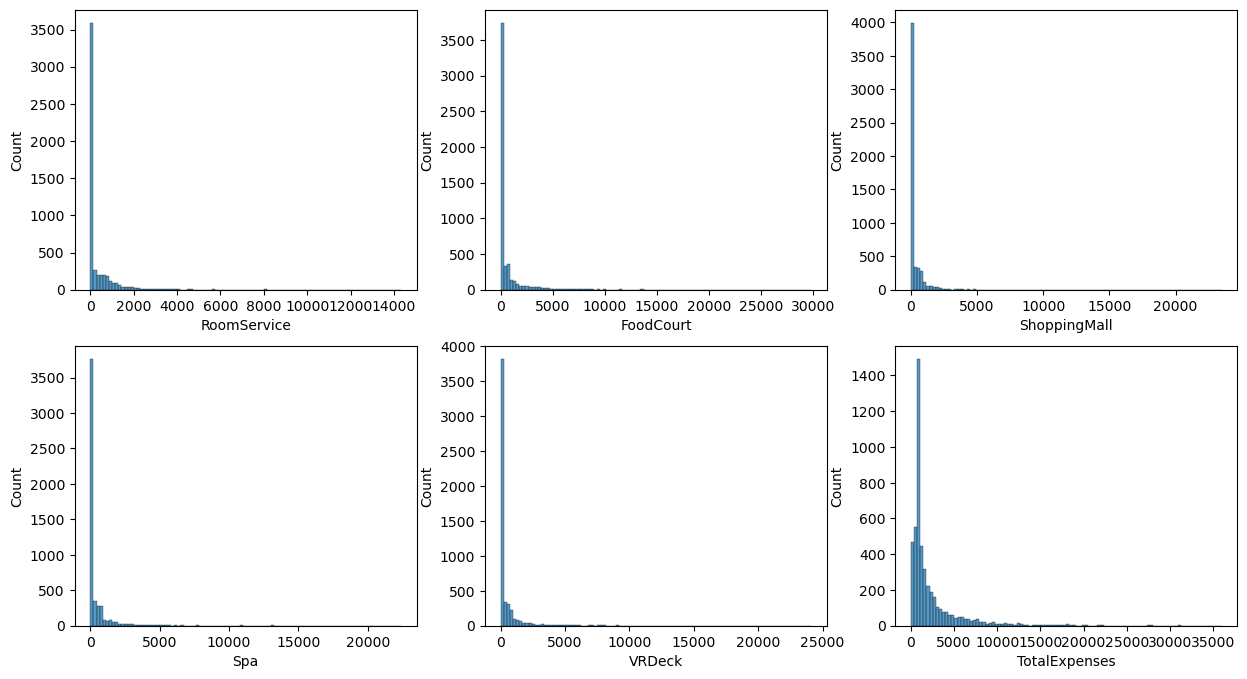

In [13]:
df_cryo_false = df[df['CryoSleep'] == False]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
attributes = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalExpenses']

for i, attribute in enumerate(attributes):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    sns.histplot(data=df_cryo_false, x=attribute, ax=ax, bins=100)

plt.show()

<Axes: xlabel='TotalExpenses', ylabel='Count'>

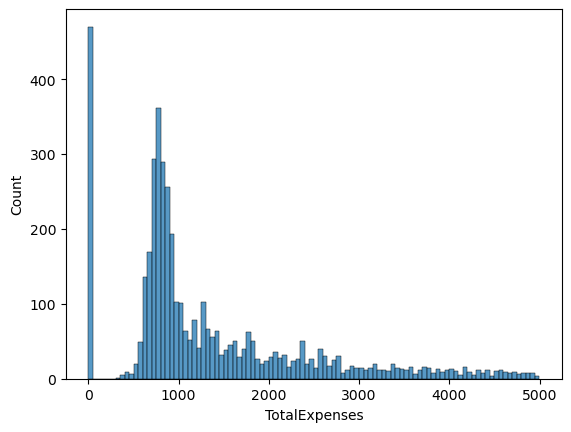

In [12]:
sns.histplot(data=df_cryo_false[df_cryo_false['TotalExpenses'] < 5000], x='TotalExpenses', bins=100)

In [15]:
df_cryo_false[df_cryo_false['TotalExpenses'] > 0]['TotalExpenses'].min()

336.0

__Wnioski:__
* z perspektywy poszczególnych udogodnień:
    * zdecydowana większość pasażerów niewprowadzonych w stan kriosnu nie korzystała z danego udogodnienia
* z perspektywy całkowitego wydatku na udogodnienia:
    * duża część pasażerów niewprowadzonych w stan kriosnu wydała w sumie na udogodnienia ok. 500-1000 jednostek monetarnych
    * istnieje wiele pasażerów, którzy nie korzystali z udogodnień pomimo nie wprowadzenia w stan kriosnu
    * pasażer korzystający z udogodnień najmniej wydał 336 jednostek monetarnych

### Jak wiek pasażera wpływał na jego chęć korzystania z udogodnień?

<Axes: xlabel='Age', ylabel='TotalExpenses'>

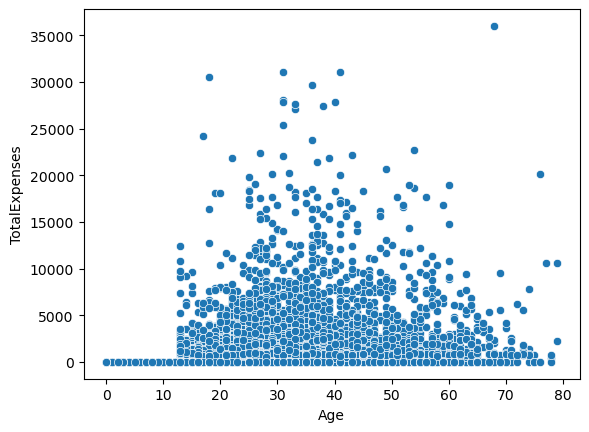

In [55]:
sns.scatterplot(data=df, x='Age', y='TotalExpenses')

In [56]:
expenses_age_min = df[df['TotalExpenses'] > 0]['Age'].min()
print(f'Wiek najmłodszego pasażera, który korzystał z udogodnień = {expenses_age_min}')

Wiek najmłodszego pasażera, który korzystał z udogodnień = 13.0


__Wnioski:__
* z udogodnień korzystali tylko pasażerowie od 13. roku życia (to może oznaczać ograniczenia wiekowe w korzystaniu z udogodnień)
* pasażer, który wydał najwięcej na udogodnienia miał ok. 70 lat

### Jaki wpływ na cechy pasażera miała jego planeta pochodzenia?

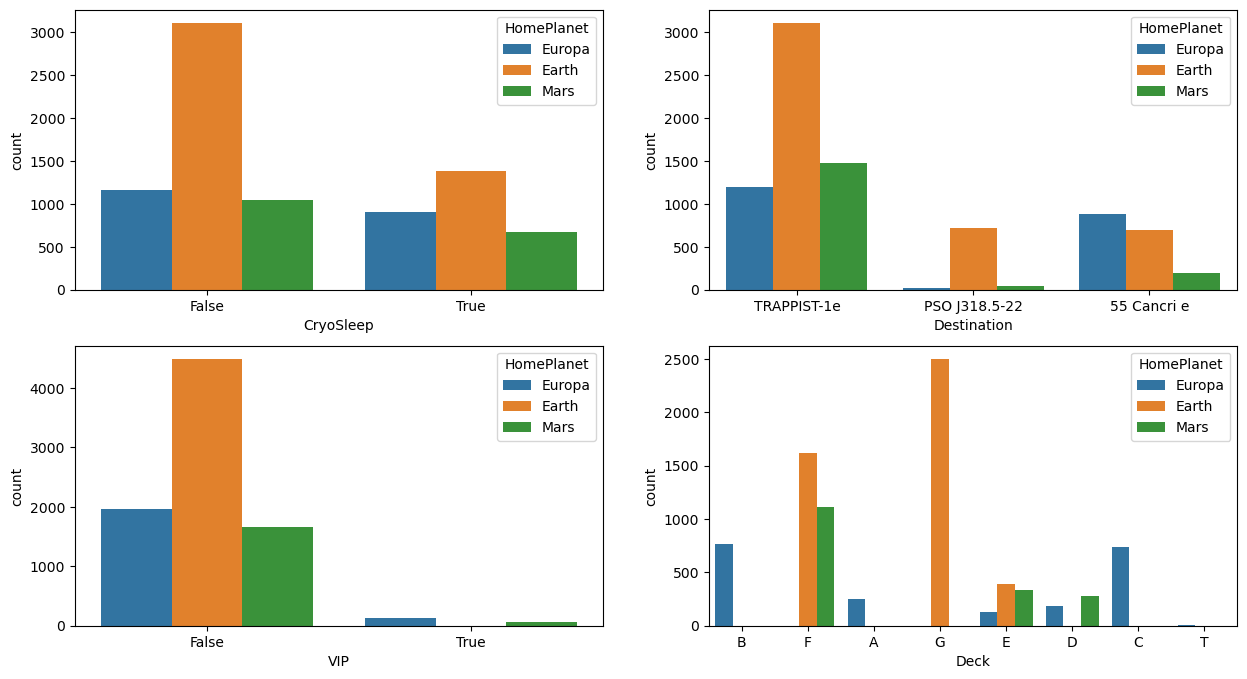

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
attributes = ['CryoSleep', 'Destination', 'VIP', 'Deck']

for i, attribute in enumerate(attributes):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    sns.countplot(data=df, x=attribute, ax=ax, hue='HomePlanet')

plt.show()

In [60]:
vip_earth = df[(df['VIP'] == True) & (df['HomePlanet'] == 'Earth')].shape[0]
print(f'Liczba pasażerów z Ziemi, który zakupili usługę VIP = {vip_earth}')

Liczba pasażerów z Ziemi, który zakupili usługę VIP = 0


<Axes: xlabel='Age', ylabel='Count'>

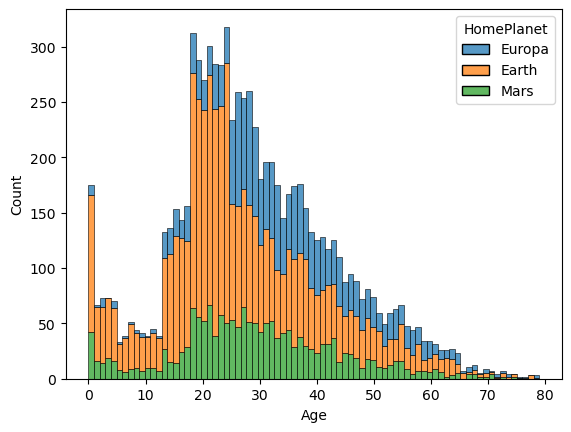

In [17]:
sns.histplot(data=df, x='Age', hue='HomePlanet', bins=80, multiple='stack')

<Axes: xlabel='TotalExpenses', ylabel='Count'>

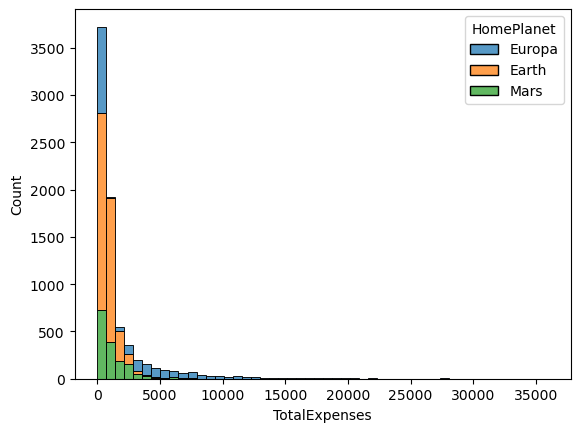

In [59]:
sns.histplot(data=df, x='TotalExpenses', hue='HomePlanet', bins=50, multiple='stack')

__Wnioski:__
* `CryoSleep`:
    * zdecydowana większość pasażerów z Ziemi nie zdecydowała się na wprowadzenie w stan kriosnu
* `Destination`:
    * najpopularniejszą planetą docelową wśród pasażerów pochodzących ze wszystkich planet była 'TRAPPIST-1e'
    * planeta docelowa 'PSO J318.5-22' była najbardziej popularna wśród pasażerów z Ziemi
* `VIP`:
    * żaden pasażer z Ziemi nie zdecydował się na zakup usługi VIP, pomimo bycia większością ze względu na planetę pochodzenia
* `Deck`:
    * pokłady B, A i C były zamieszkiwane wyłącznie przez pasażerów z planety 'Europa'
    * pokład G był zamieszkiwany wyłącznie przez pasażerów z Ziemi
    * pokład E był jedynym zamieszkiwanych przez pasażerów ze wszystkich 3 planet
* `Age`:
    * pasażerowie niepełnoletni pochodzili w większości z Ziemi
    * niewiele pasażerów z planety 'Europa' było niepełnoletnich
    * rozkład wieku pasażerów z planety 'Europa' jest bardziej skierowany w stronę starszą
* `TotalExpenses`:
    * większość pasażerów niekorzystających z udogodnień pochodziła z Ziemi
    * większość pasażerów wydających większe sumy na udogodnienia pochodziła z planety 'Europa'

### Z których udogodnień korzystało najwięcej pasażerów?

<Axes: >

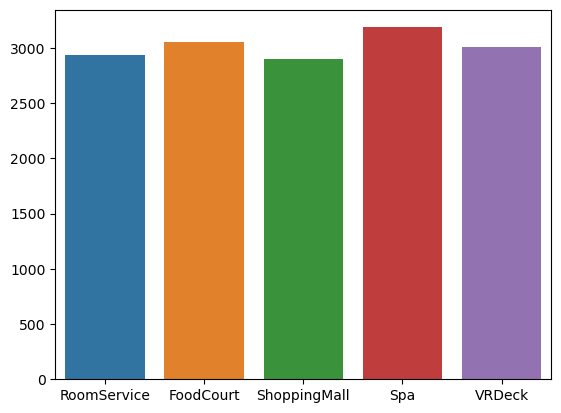

In [33]:
attributes = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
n_passengers = [df[df[atr] > 0].shape[0] for atr in attributes]
sns.barplot(x=attributes, y=n_passengers)

__Wnioski:__
* ze wszystkich udogodnień korzystała mniej więcej równa liczba pasażerów
* najwięcej pasażerów korzystało z udogodnienia `Spa`

### Ile średnio wydał jeden pasażer korzystający z danego udogodnienia?

<Axes: >

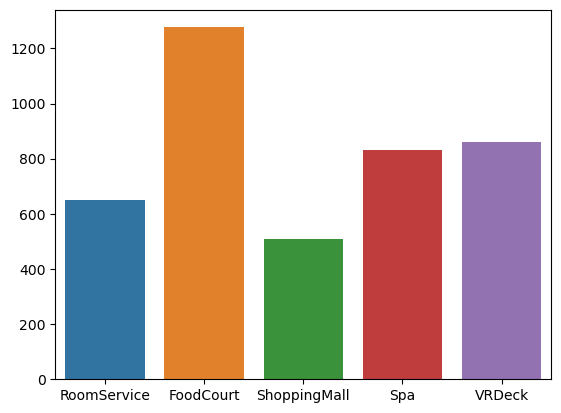

In [34]:
average_prices = [df[atr].sum() / n_passengers[i] for i, atr in enumerate(attributes)]
sns.barplot(x=attributes, y=average_prices)

__Wnioski:__
* najwięcej średnio wydał 1 pasażer korzystający z udogodnienia `FoodCourt` (_w końcu jedzenia to ważna sprawa, którą się robi codziennie ;)_)
* najmniej średnio wydał 1 pasażer korzystający z udogodnienia `ShoppingMall`

### Ile pasażerów korzystało z ilu udogonień?

0    3653
3    2068
4    1225
2    1224
1     271
5     252
dtype: int64


Text(0, 0.5, 'number of passangers')

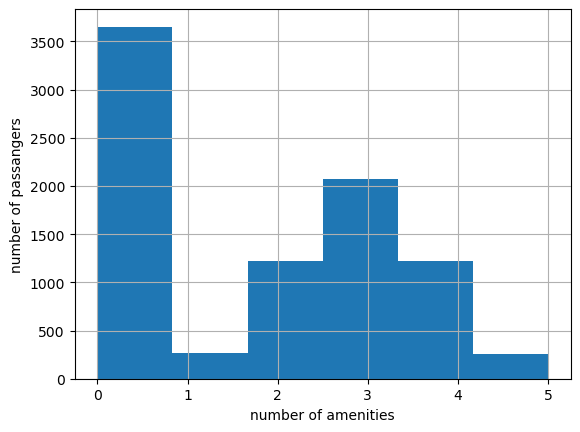

In [38]:
def count_non_zero(row):
    return sum(row > 0)

n_amenities = df[attributes].apply(count_non_zero, axis=1)
print(n_amenities.value_counts())
n_amenities.hist(bins=6)
plt.xlabel('number of amenities')
plt.ylabel('number of passangers')

__Wnioski:__
* najwięcej pasażerów nie korzystało z żadnego udogodnienia
* pomijając pasażerów niekorzystających z udogodnień, najwięcej pasażerów korzystało z 3 udogodnień
* liczba pasażerów korzystających z 2 i 4 udogodnień była bardzo podobna
* liczba pasażerów korzystających z 1 i 5 udogodnień była bardzo podobna